In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.cm as cm
import seaborn as sns

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
%cd /content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasterovanje

/content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasterovanje


In [198]:
def get_top_keywords(n_terms):
    df = pd.DataFrame(X).groupby(clusters).mean() 
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(' '.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

In [199]:
def plot_reduced(df, x0, x1, clusters, name_map, title):
  df['cluster'] = clusters
  df['cluster'] = X['cluster'].map(name_map)
  df['x0'] = x0
  df['x1'] = x1

  palette_colors = ['red', 'blue', 'green']
  palette = {key: palette_colors[i] for i, key in enumerate(name_map.values())}

  plt.figure(figsize=(10, 7))
  plt.title(title, fontdict={"fontsize": 18})
  sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette=palette)
  plt.show()

  df.drop(['cluster', 'x0', 'x1'], axis=1, inplace=True)  

In [200]:
def plot_3d(df, x, y, z, clusters):
  df['cluster'] = clusters
  df['x'] = x
  df['y'] = y
  df['z'] = z

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  scatter = ax.scatter(df['x'], df['y'], df['z'], c=df['cluster'], cmap='viridis')
  colorbar = plt.colorbar(scatter)
  plt.show()

  df.drop(['cluster', 'x', 'y', 'z'], axis=1, inplace=True)  

In [201]:
def plot_metrics(K, inertias, silhouettes):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

  ax1.plot(K, inertias, 'rx-')
  ax1.set_xlabel('Values of K')
  ax1.set_ylabel('Inertia')
  ax1.set_title('Inertia')

  ax2.plot(K, silhouettes, 'bx-')
  ax2.set_xlabel('Values of K')
  ax2.set_ylabel('Silhouettes')
  ax2.set_title('Silhouettes')

  plt.tight_layout()
  plt.show()

In [225]:
def plot_iterations(df, reduced_matrix):

  inertias = []
  silhouettes = []
  K = range(2, 10)

  fig, axs = plt.subplots(4, 2, figsize=(10, 12))

  for i, k in enumerate(K):

    row = i // 2 
    col = i % 2

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init = 10)
    y_kmeans = kmeans.fit_predict(df)

    ax = axs[row, col]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=y_kmeans)
    if not isinstance(df, pd.DataFrame):
      ax.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=70, c='red', marker='x')
    ax.set_title('(k={})'.format(k))

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(lsa_matrix, kmeans.labels_))

    ax.text(0.05, 0.95, 
            'Inertia: {:.2f}\nSilhouette: {:.2f}'.format(inertias[i], silhouettes[i]),
            verticalalignment='top', 
            horizontalalignment='left',
            transform=ax.transAxes, 
            fontsize=10, 
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})

  plt.tight_layout()
  plt.show()
  return K, inertias, silhouettes

In [203]:
data = pd.read_csv('../pretprocesiranje/cluster_data.csv')

In [204]:
terms = data.columns.tolist()

#**KMeans**

kmeans sa 3 klastera jer znamo da imamo 3 klase :) pa smenjanja dimenzionalnosti da bismo viualizovali cisto da vidimo kako su rasporedjeni

In [205]:
X = data.copy() 

In [206]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [207]:
get_top_keywords(10)


Cluster 0
phd magic youtube degree cream ice mushroom chemistry physic look

Cluster 1
effect research year sense solution science electron matter make thing

Cluster 2
sidebar hell physicsmemes mod username question explain stop check please


In [208]:
cluster_map = {0: "biology", 1: "chemistry", 2: "physics"}

#kmeans + pca

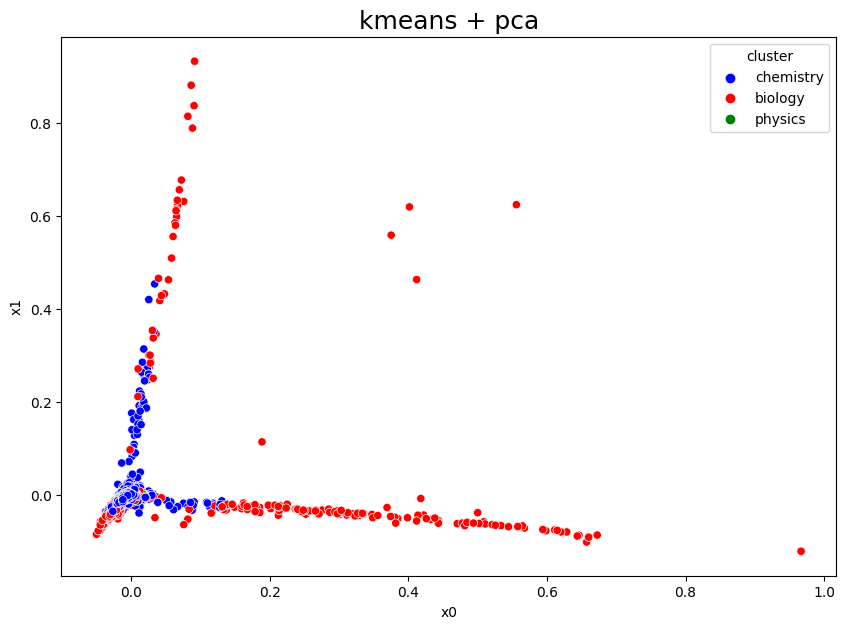

In [209]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.values)
x0, x1 = pca_vecs[:, 0], pca_vecs[:, 1]
plot_reduced(X, x0, x1, clusters, cluster_map, "kmeans + pca")

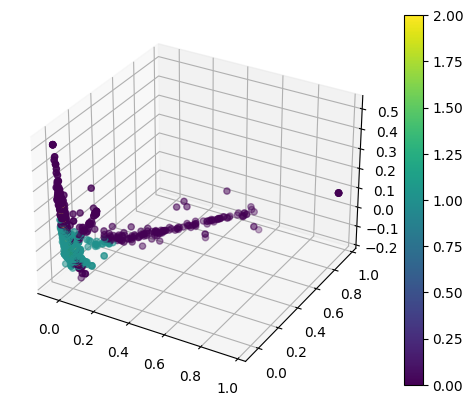

In [210]:
pca = PCA(n_components=3, random_state=42)
pca_vecs = pca.fit_transform(X.values)
x, y, z = pca_vecs[:, 0], pca_vecs[:, 0], pca_vecs[:, 2]
plot_3d(X, x, y, z, clusters)

# kmeans + lsa

za smanjenje dimenzionalnosti teksta se obicno koristi lsa, a ne pca

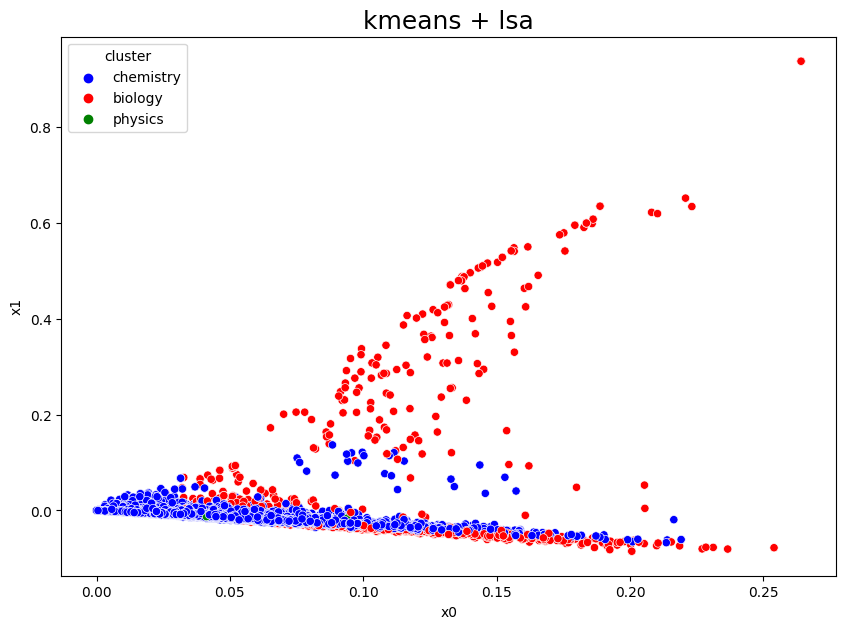

In [211]:
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(X)
x0, x1 = lsa_matrix[:, 0], lsa_matrix[:, 1]
plot_reduced(X, x0, x1, clusters, cluster_map, "kmeans + lsa")

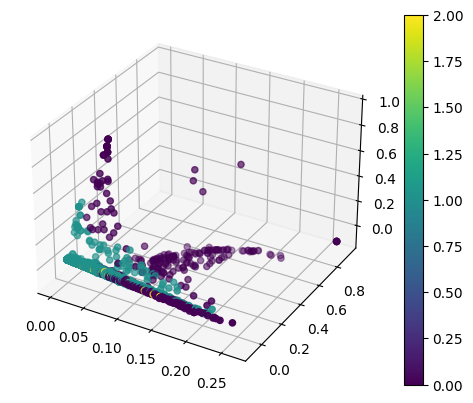

In [212]:
lsa = TruncatedSVD(n_components=3)
lsa_matrix = lsa.fit_transform(X)
x, y, z = lsa_matrix[:, 0], lsa_matrix[:, 1], lsa_matrix[:, 2]
plot_3d(X, x, y, z, clusters)

#Prikaz pravih klasa

In [213]:
#TODO: sredi u preprocesiranju da se izdvaja y 

In [214]:
train = pd.read_csv('../pretprocesiranje/train_data.csv')
test = pd.read_csv('../pretprocesiranje/test_data.csv')

In [215]:
combined_df = pd.concat([train, test], axis=0)
combined_df.reset_index(drop=True, inplace=True)

In [216]:
clusters = combined_df['0']

In [217]:
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(X)
x0, x1 = lsa_matrix[:, 0], lsa_matrix[:, 1]
cluster_map = {0: "biology", 1: "chemistry", 2: "physics"}

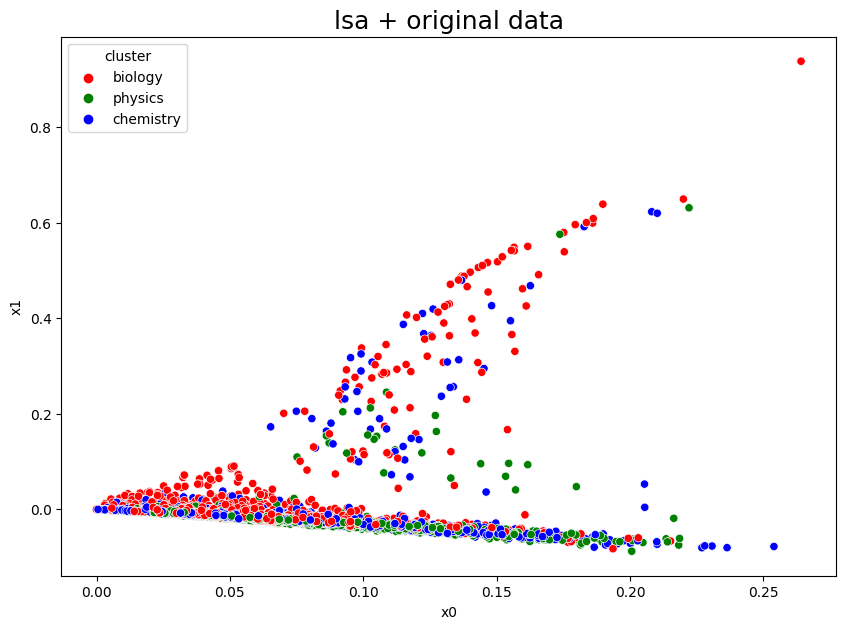

In [218]:
plot_reduced(X, x0, x1, clusters, cluster_map, "lsa + original data")

ovo sam bog ne moze razdvojiti wtf is this


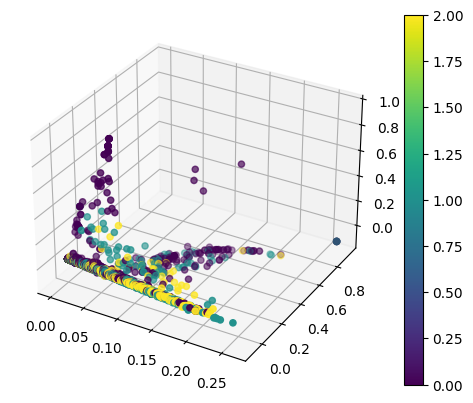

In [219]:
lsa = TruncatedSVD(n_components=3)
lsa_matrix = lsa.fit_transform(X)
x, y, z = lsa_matrix[:, 0], lsa_matrix[:, 1], lsa_matrix[:, 2]
plot_3d(X, x, y, z, clusters)

#trazenje optimalnog broja klastera

In [220]:
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(X)

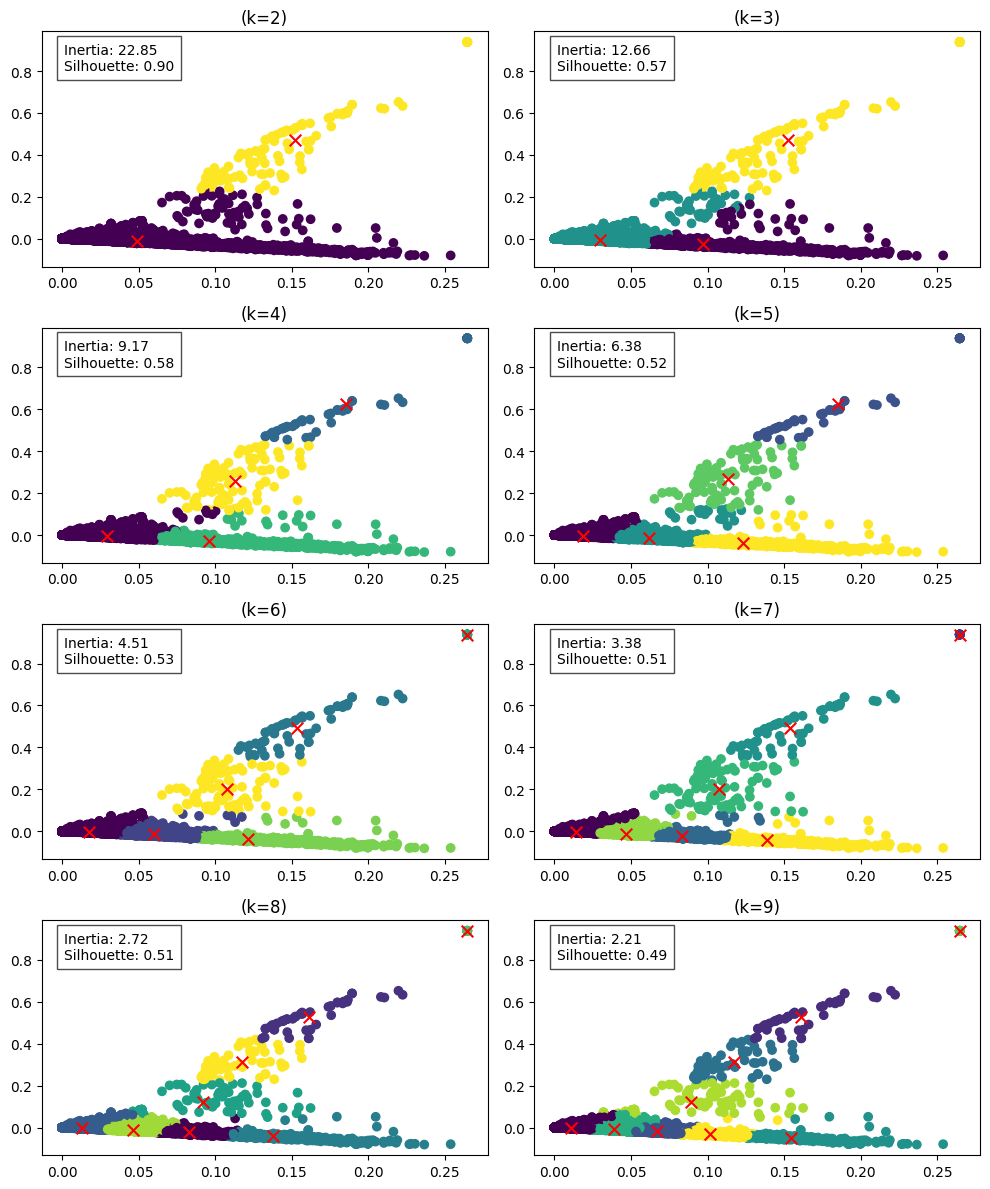

In [226]:
K, inertias, silhouettes = plot_iterations(lsa_matrix, lsa_matrix)

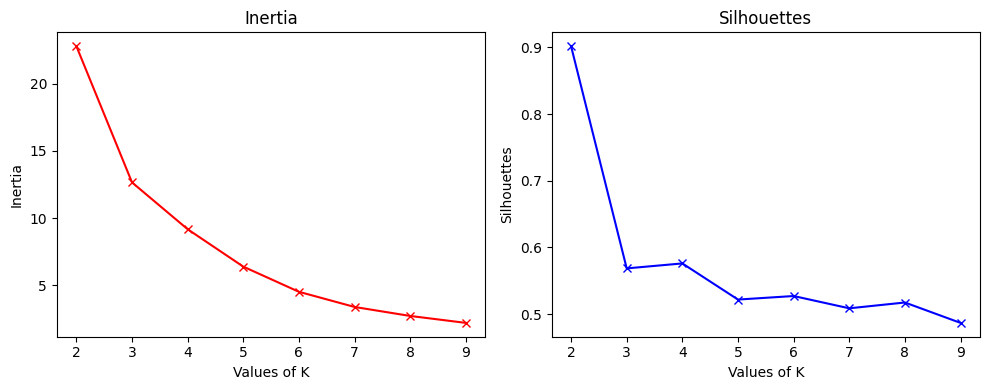

In [222]:
plot_metrics(K, inertias, silhouettes)

najbolji rez za 2,3,4

#Bez transformacija

In [223]:
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(X)

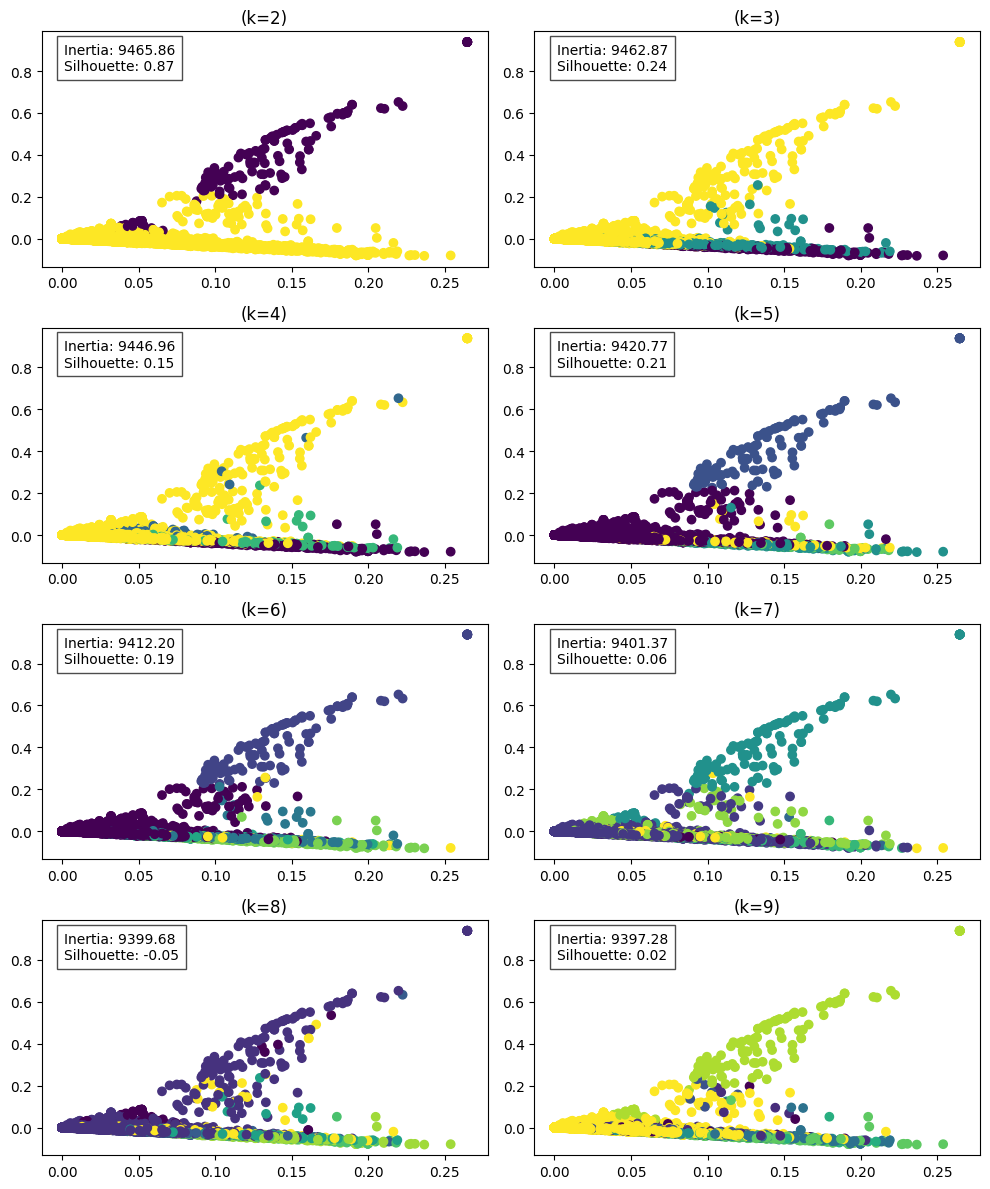

In [227]:
K, inertias, silhouettes = plot_iterations(X, lsa_matrix)

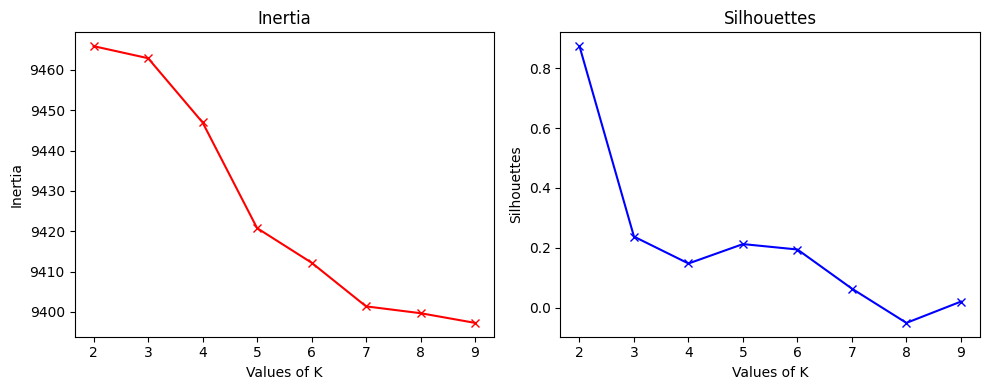

In [228]:
plot_metrics(K, inertias, silhouettes)

najbolji rez za 2, 5